#Import data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import array as arr

Import data 

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/datasets/student_performance/StudentsPerformance.csv")
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Data visualization

In [ ]:
# crerate namelist of cat and int data
cat_cols=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
int_cols=['math score','reading score','writing score']

In [ ]:
# checking for na values
dataset.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#Check for discrete values
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
#Lets encode the cat_cols. we will also maintain a list of objects of encoders used
from sklearn.preprocessing import LabelEncoder
encoders_list=[]
for i in cat_cols:
  encoder=LabelEncoder()
  dataset[i]=encoder.fit_transform(dataset[i])
  encoders_list.append(encoder)
encoders_list

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [ ]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


#First try- no scaling, Label encoding

In [ ]:
#make a copy of the df
dfTest1=dataset.copy()
dfTest1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [ ]:
Y=dfTest1['writing score']
X=dfTest1.drop(['writing score'],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,Y)

In [ ]:
#Tried using linear reg
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_test,y_test)

0.943863712479351

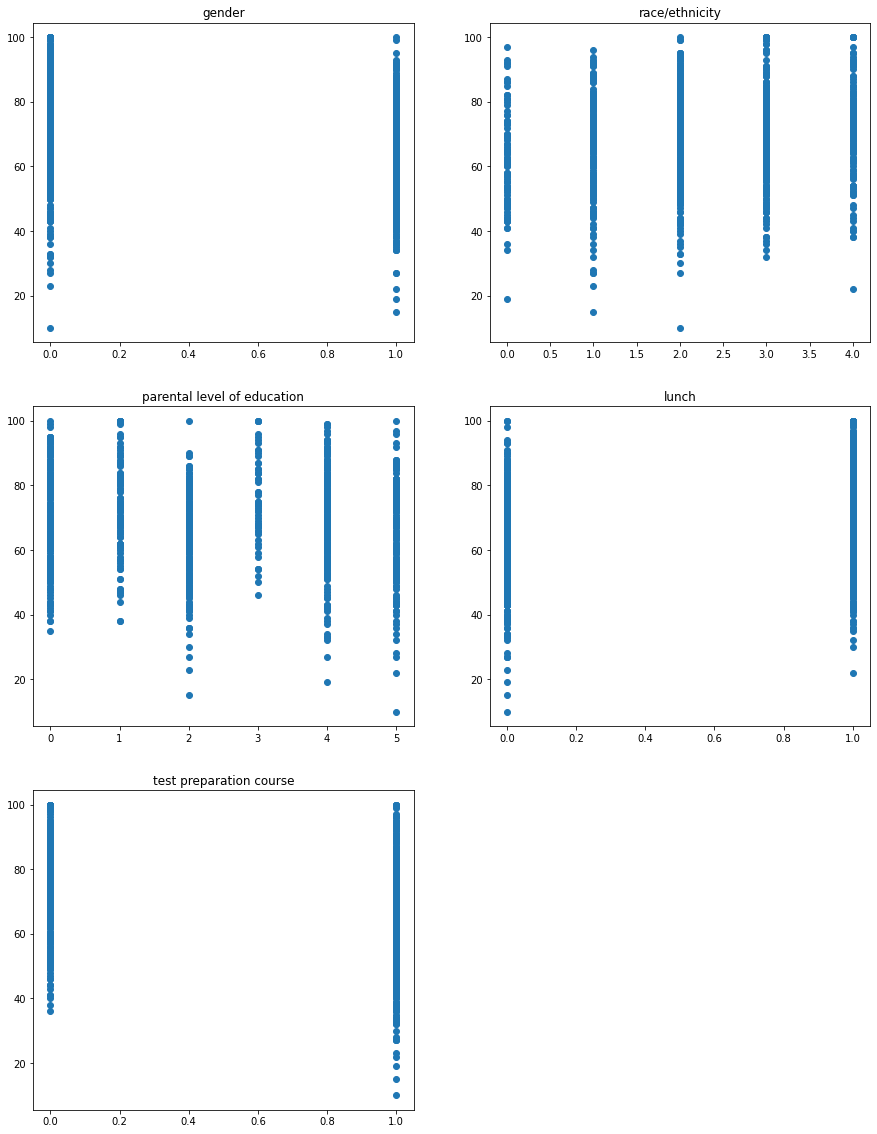

In [ ]:
x=1
fig=plt.figure(figsize=(15,20))
for i in cat_cols:
  plt.subplot(3,2,x)
  plt.title(i)
  plt.scatter(X[i],Y)
  x+=1

In [ ]:
#Tried using Logistic reg
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=100,solver='lbfgs').fit(x_train,y_train)
log_reg.score(x_test,y_test)
print(log_reg)
# got "TOTAL NO. of ITERATIONS REACHED LIMIT." error

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Tried with DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor().fit(x_train,y_train)
tree_reg.score(x_test,y_test)

0.8671621267475127

In [ ]:
#Tried using ridge reg
from sklearn.linear_model import Ridge
ridge_reg=Ridge().fit(x_train,y_train)
ridge_reg.score(x_test,y_test)

0.9438212883507444

#Now we will scale the scores in other subjects and test accuracy

In [ ]:
#Create X and Y
X=dataset.copy()
X=X.drop(['writing score'],axis=1)
Y=dataset['writing score']

In [ ]:
# Scaling the math and reading scores
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [ ]:
#Create training and testing data
x_train, x_test, y_train, y_test=train_test_split(X,Y)

In [ ]:
#Linear reg
len_reg1=LinearRegression().fit(x_train,y_train)
len_reg1.score(x_test,y_test)

0.9404394544093906

In [ ]:
#Tried with DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor().fit(x_train,y_train)
tree_reg.score(x_test,y_test)

0.869507124148256

In [ ]:
#Tried using ridge reg
from sklearn.linear_model import Ridge
ridge_reg=Ridge().fit(x_train,y_train)
ridge_reg.score(x_test,y_test)

0.9404757625572026